# Proyek Analisis Data: bike-sharing-dataset
- **Nama:** Ardhian Jaya Wibawa
- **Email:** ardhianjayawibawa@gmail.com
- **ID Dicoding:** ardhian_jaya_wibawa

## Menentukan Pertanyaan Bisnis

### 1. Di antara tahun 2011 dan 2012, musim apa yang menjadi waktu paling ramai bagi penyewaan sepeda?
### 2. Apakah terjadi perubahan yang signifikan dalam permintaan layanan penyewaan sepeda selama periode 2011-2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

load data day.csv

In [2]:
day_dataframe = pd.read_csv("day.csv")
day_dataframe.head(6)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606


load data hour.csv

In [3]:
hour_dataframe = pd.read_csv("hour.csv")
hour_dataframe.head(6)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


**Insight memuat data bike yang terdiri dari day dan hour:**

day.csv memberikan data harian dari penyewaan sepeda sedangkan hour.csv lebih spesifik ke waktunya.

### Assessing Data

**menilai data day.csv**

In [4]:
day_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Menilai data hour.csv**

In [5]:
hour_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**melihat apakah data day.csv dan hour.csv ada duplikatnya atau tidak**

In [6]:
print("data duplicate: ", day_dataframe.duplicated().sum())

data duplicate:  0


In [7]:
print("data duplicate: ", hour_dataframe.duplicated().sum())

data duplicate:  0


**memeriksa parameter statistik dari kolom numerik yang terdapat dalam day.csv dan hour.csv**

In [8]:
day_dataframe.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**data day.csv tidak memiliki outlier.**

In [9]:
hour_dataframe.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**insight dari menilai, melihat missing. melihat duplicate:**

setelah melakukan pengecekan pada dataframe, tidak ada missing data dan tipe data, tidak ada data yang terduplikasi, tidak ada data yang inaccurate(outlier)

### Cleaning Data

**rename beberapa kolom data day.csv dan hour.csv yang sulit dipahami artinya**

In [10]:
day_dataframe.rename(columns={
    "instant": "record_index",
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "casual": "casual_users",
    "registered": "regular_users",
    "cnt": "grand_total"
}, inplace=True)

In [11]:
hour_dataframe.rename(columns={
    "instant": "record_index",
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "casual": "casual_users",
    "registered": "regular_users",
    "cnt": "grand_total"
}, inplace=True)

**check apakah sudah berubah kolomnnya**

In [12]:
day_dataframe.head()

,record_index,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual_users,regular_users,grand_total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
hour_dataframe.head()

,record_index,dateday,season,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual_users,regular_users,grand_total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight Cleaning Data**

karena nama kolomnya kurang informatif, maka nama kolomnya diganti agar lebih mudah dipahami. dan setelah dicek datanya sudah berubah kolomnya

## Exploratory Data Analysis (EDA)

**Eksplorasi data jumlah pengguna yang menyewa sepeda setiap musimnya.**

In [14]:
day_dataframe.groupby('season', observed=False).agg({'grand_total': 'sum'})

,grand_total
season,
1,471348
2,918589
3,1061129
4,841613


**eksplorasi jumlah sewa apakah mengalami peningkatan atau penurunan**

In [15]:
import pandas as pd

dataframe = day_dataframe

dataframe['dateday'] = pd.to_datetime(dataframe['dateday'])

yearly_total = dataframe.groupby(dataframe['dateday'].dt.year)['grand_total'].sum()


print(yearly_total)

dateday
2011    1243103
2012    2049576
Name: grand_total, dtype: int64


**data yang bisa diambil dari jumlah penyewa setiap musimnya:**

(1)musim spring terdapat 471,348 total sepeda yang disewa

(2)musim summer terdapat 918,589 total sepeda yang disewa

(3)musim fall terdapat 1,061,129 total sepeda yang disewa

(4)musim winter terdapat 841,613 total sepeda yang disewa

**data yang bisa diambil dari data peningkatan dan penurunan:**

sewa sepeda mengalami peningkatan signifikan yang awalnya pada tahun 2011 berjumlah 1243103 menjadi berjumlah 2049576 pada tahun 2012

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### 1. Di antara tahun 2011 dan 2012, musim apa yang menjadi waktu paling ramai bagi penyewaan sepeda?

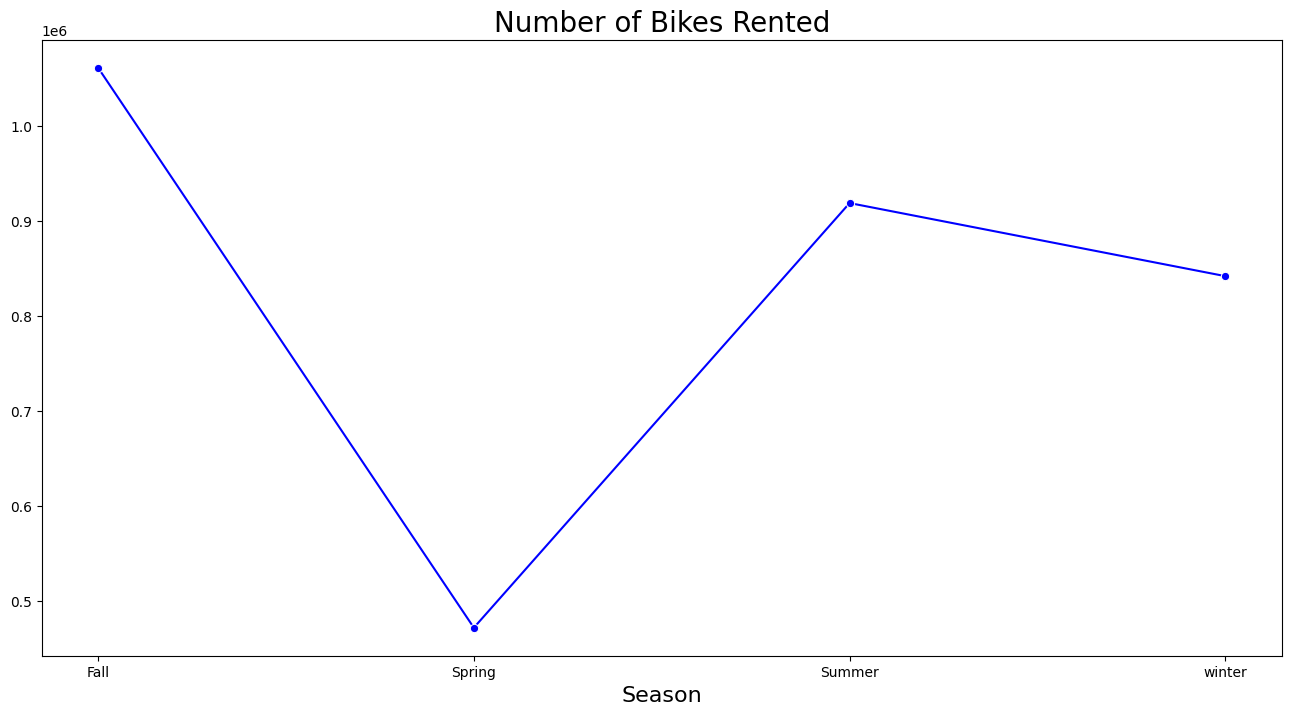

In [16]:
def convertSeason(x):
  if x == 1: return "Spring"
  elif x == 2: return "Summer"
  elif x == 3: return "Fall"
  elif x == 4: return "winter"
day_dataframe['season'] = day_dataframe['season'].apply(lambda x: convertSeason(x))

seasonal_grouped = day_dataframe.groupby(by='season', as_index=False).agg({
  'grand_total': 'sum'
})
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(data=seasonal_grouped, x="season", y="grand_total", marker="o", color="blue")
ax.set_title("Number of Bikes Rented", fontsize=20)
ax.set_ylabel(None)
ax.set_xlabel("Season", fontsize=16)

plt.show()


**JAWABAN:**
**penyewa sepeda terbanyak ada di musim fall**

### Pertanyaan 2:
### 2. Apakah terjadi perubahan yang signifikan dalam permintaan layanan penyewaan sepeda selama periode 2011-2012?

C:\Users\HP\AppData\Local\Temp\ipykernel_10624\1023173946.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_dataframe = day_dataframe.resample(rule="M", on="dateday").agg({


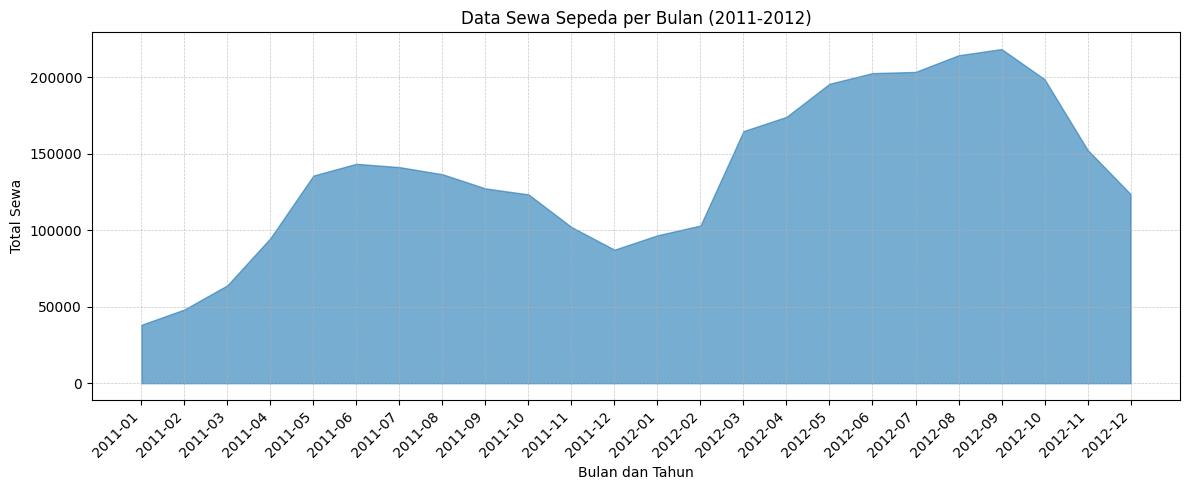

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

monthly_dataframe = day_dataframe.resample(rule="M", on="dateday").agg({
    "dateday": "max",  # Use "dteday" for consistency
    "grand_total": "sum"
})


monthly_dataframe.index = monthly_dataframe.index.strftime('%Y-%m')


colors = ['#1f77b4'] 


plt.figure(figsize=(12, 5))
plt.fill_between(monthly_dataframe.index,  
                 monthly_dataframe["grand_total"],
                 color=colors[0], alpha=0.6)

plt.title("Data Sewa Sepeda per Bulan (2011-2012)")
plt.xlabel("Bulan dan Tahun")
plt.ylabel("Total Sewa")
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


### JAWABAN:
### 1. Di antara tahun 2011 dan 2012, musim apa yang menjadi waktu paling ramai bagi penyewaan sepeda?
**penyewa sepeda terbanyak ada di musim fall**

yang bisa diambil dari data sewa sepeda per bulan:

### 2. Apakah terjadi perubahan yang signifikan dalam permintaan layanan penyewaan sepeda selama periode 2011-2012?

Tren Musiman:
Penyewaan sepeda meningkat secara signifikan dari Januari 2011 hingga Juni 2011, dengan puncak sekitar Mei-Juni 2011.
Ada penurunan bertahap dari Juni 2011 hingga Desember 2011, dengan beberapa fluktuasi.
Kenaikan tajam terlihat lagi di awal tahun 2012, dengan puncak sekitar April-Mei 2012.
Tren penyewaan menurun menjelang akhir tahun 2012, mirip dengan pola di tahun 2011.
Periode Tinggi dan Rendah:

Periode Penyewaan Tertinggi: Mei-Juni pada kedua tahun menunjukkan jumlah penyewaan sepeda tertinggi, dengan total mendekati atau melebihi 200.000 penyewaan.
Periode Penyewaan Terendah: Januari pada tahun 2011 dan 2012 memiliki penyewaan terendah, sekitar 50.000-75.000 penyewaan.
Tren Keseluruhan:

Ada pola musiman yang konsisten di mana penyewaan sepeda paling tinggi terjadi pada akhir musim semi (April-Mei) dan paling rendah pada musim dingin (Desember-Januari).
Pola ini berulang selama dua tahun, menunjukkan pengaruh yang jelas dari musim terhadap perilaku penyewaan sepeda.

## Conclusion

1. Pada musim apa sepeda paling banyak disewa sepanjang tahun 2011-2012?
Pengguna lebih banyak menyewa sepeda pada musim Fall.

2. Apakah terjadi perubahan yang signifikan dalam permintaan layanan penyewaan sepeda selama periode 2011-2012?
Musim Puncak:
Terdapat peningkatan yang signifikan pada jumlah sewa sepeda mulai dari pertengahan tahun 2011 hingga awal tahun 2012. Hal ini menunjukkan adanya musim puncak dalam penggunaan sepeda, kemungkinan besar dipengaruhi oleh faktor cuaca yang lebih baik atau adanya event-event khusus selama periode tersebut.

Fluktuasi Bulanan:
Jumlah sewa sepeda mengalami fluktuasi yang cukup besar dari bulan ke bulan. Hal ini mengindikasikan adanya faktor-faktor musiman atau peristiwa-peristiwa tertentu yang mempengaruhi minat masyarakat untuk menyewa sepeda.

Penurunan di Akhir Tahun:
Setelah mencapai puncaknya di awal tahun 2012, jumlah sewa sepeda mengalami penurunan yang cukup tajam. Kemungkinan hal ini disebabkan oleh perubahan cuaca, liburan akhir tahun, atau faktor lainnya yang mengurangi minat masyarakat untuk bersepeda.